In [1]:
import gpflow
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from gpflow.utilities import print_summary, set_trainable
from gpflow.ci_utils import ci_niter
import pandas as pd

# The lines below are specific to the notebook format
%matplotlib inline
plt.rcParams["figure.figsize"] = (12, 6)

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume
0,1619049600000,2021-04-22 00:00:00,BTCUSD,53804.03,54104.26,53633.30,53853.52,10.712695
1,1619046000000,2021-04-21 23:00:00,BTCUSD,54027.38,54377.24,53599.41,53804.03,122.252890
2,1619042400000,2021-04-21 22:00:00,BTCUSD,54793.66,55073.65,53800.00,54027.38,101.185655
3,1619038800000,2021-04-21 21:00:00,BTCUSD,54998.52,55320.25,54714.28,54793.66,52.445867
4,1619035200000,2021-04-21 20:00:00,BTCUSD,55493.13,55525.74,54835.87,54998.52,116.188554


In [84]:
X = np.linspace(0,1,34)
frac = [-0.54,-0.55,0.0,0.5,-0.4,-0.45,-0.4,-0.32,-0.34,-0.1,-0.05,0.05,0.09,0.8,0.85,1.2,1.1]
Y = frac
for i in reversed(frac):
    Y.append(i-0.3)
realY = Y
realY[30] = -0.21
realY[31] = 0.35
realY[32] = 0.25
realY[33] = 0.15


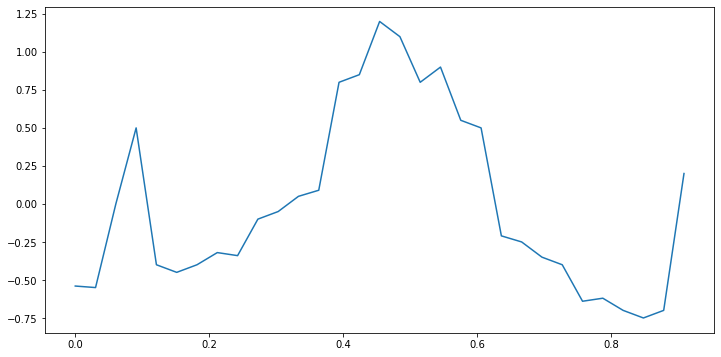

In [45]:
plt.plot(X[:31],Y[:31])

In [65]:
X = X[:31].reshape(-1,1)
Y = np.asarray(Y[:31]).reshape(-1,1)

In [66]:
k1 = gpflow.kernels.Linear()
k2 = gpflow.kernels.RBF()
k3 = gpflow.kernels.Matern32()
k4 = gpflow.kernels.Matern52()

In [67]:
m1 = gpflow.models.GPR((X,Y), kernel=k1)
maxiter = ci_niter(10000)
gpflow.optimizers.Scipy().minimize(
    m1.training_loss, m1.trainable_variables, options=dict(maxiter=maxiter), method="L-BFGS-B",
)
m2 = gpflow.models.GPR((X,Y), kernel=k2)
maxiter = ci_niter(10000)
gpflow.optimizers.Scipy().minimize(
    m2.training_loss, m2.trainable_variables, options=dict(maxiter=maxiter), method="L-BFGS-B",
)
m3 = gpflow.models.GPR((X,Y), kernel=k3)
maxiter = ci_niter(10000)
gpflow.optimizers.Scipy().minimize(
    m3.training_loss, m3.trainable_variables, options=dict(maxiter=maxiter), method="L-BFGS-B",
)
m4 = gpflow.models.GPR((X,Y), kernel=k4)
maxiter = ci_niter(10000)
gpflow.optimizers.Scipy().minimize(
    m4.training_loss, m4.trainable_variables, options=dict(maxiter=maxiter), method="L-BFGS-B",
)

      fun: 10.041156554447028
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([9.40262445e-07, 4.79752687e-08, 1.87973169e-07])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 24
      nit: 18
   status: 0
  success: True
        x: array([-2.37412615, -1.05928043, -3.33597207])

In [72]:
test = np.linspace(0,1,34).reshape(-1,1)
mu_1, cov_1 = m1.predict_f(test)
mu_2, cov_2 = m2.predict_f(test)
mu_3, cov_3 = m3.predict_f(test)
mu_4, cov_4 = m4.predict_f(test)

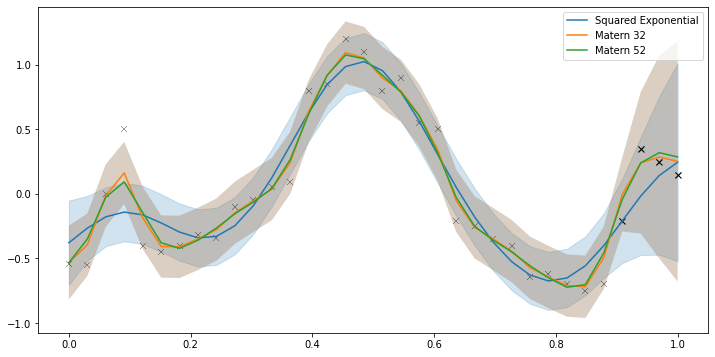

In [85]:
plt.figure(figsize=(12, 6))
plt.plot(X, Y, "kx", mew=0.3)
plt.plot(test[30:], np.asarray(realY).reshape(-1,1)[30:], "kx")
plt.plot(test, mu_2, label="Squared Exponential")
plt.plot(test, mu_3, label="Matern 32")
plt.plot(test, mu_4, label="Matern 52")
plt.fill_between(
    test[:, 0],
    (mu_2[:, 0] - 1.96 * np.sqrt(cov_2[:, 0])),
    (mu_2[:, 0] + 1.96 * np.sqrt(cov_2[:, 0])),
    color="C0",
    alpha=0.2,
)
plt.fill_between(
    test[:, 0],
    (mu_3[:, 0] - 1.96 * np.sqrt(cov_3[:, 0])),
    (mu_3[:, 0] + 1.96 * np.sqrt(cov_3[:, 0])),
    alpha=0.2,
)
plt.fill_between(
    test[:, 0],
    (mu_3[:, 0] - 1.96 * np.sqrt(cov_3[:, 0])),
    (mu_3[:, 0] + 1.96 * np.sqrt(cov_3[:, 0])),
    alpha=0.2,
)
plt.legend()


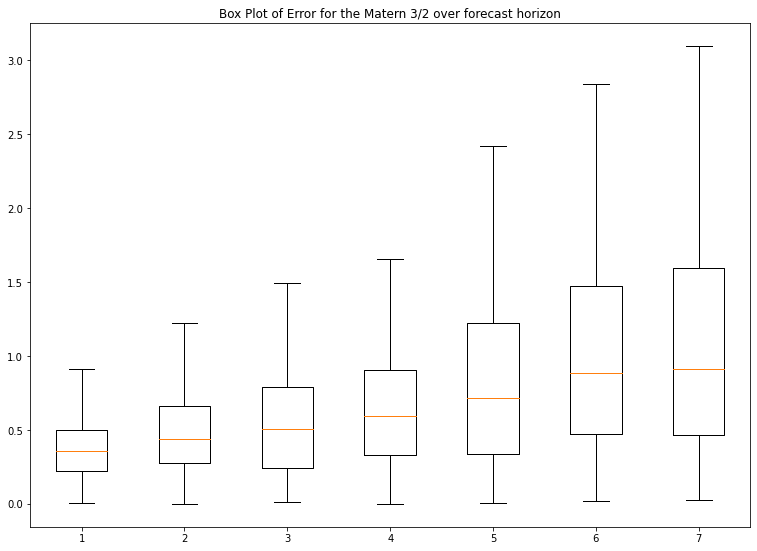

In [102]:
data = np.abs(np.random.lognormal(0.30, 0.15, 200)-1.0)
data1 = np.abs(np.random.lognormal(0.39, 0.2, 200)-1.0)
data2 = np.abs(np.random.lognormal(0.42, 0.3, 200)-1.0)
data3 = np.abs(np.random.lognormal(0.47, 0.35, 200)-1.0)
data4 = np.abs(np.random.lognormal(0.55, 0.37, 200)-1.0)
data5 = np.abs(np.random.lognormal(0.63, 0.38, 200)-1.0)
data6 = np.abs(np.random.lognormal(0.65, 0.4, 200)-1.0)
  
data = [data, data1, data2, data3, data4, data5, data6]
  
fig = plt.figure(figsize =(10, 7))
  
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
ax.set_title("Box Plot of Error for the Matern 3/2 over forecast horizon")
  
# Creating plot
bp = ax.boxplot(data, showfliers=False)
  
# show plot
plt.show()